In [36]:
from tensorflow.keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# import data & prepare

In [27]:
from tensorflow.keras.datasets import mnist
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
train_data = train_data.reshape((60_000, 28, 28, 1))
train_data = train_data.astype("float32") / 255

p = np.random.permutation(len(train_data))
train_data = train_data[p]
train_targets = train_targets[p]

test_data = test_data.reshape((10_000, 28, 28, 1))
test_data = test_data.astype("float32") / 255

train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

In [32]:
partial_train_data = train_data[:50_000]
partial_train_targets = train_targets[:50_000]

validation_data = train_data[50_000:]
validation_targets = train_targets[50_000:]

# define model structure

In [44]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)), # shape of input the model expects
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# pre training
## train initial model on parts of the data

In [ ]:
hist = model.fit(
    x=partial_train_data,
    y=partial_train_targets,
    epochs=5,
    batch_size=64,
    validation_data=(validation_data, validation_targets)
)

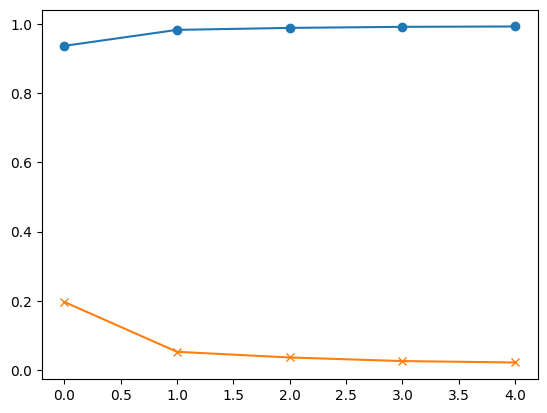

In [42]:
plt.plot(hist.history["accuracy"], label="acuracy", marker="o")
plt.plot(hist.history["loss"], label="loss", marker="x")
plt.show()

In [35]:
model.evaluate(test_data, test_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9764 - loss: 0.0774


[0.06250523030757904, 0.9803000092506409]

# actual training
## train actual model on all of the training data

In [45]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)), # shape of input the model expects
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
hist = model.fit(
    x=train_data,
    y=train_targets,
    epochs=5,
    batch_size=64
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - accuracy: 0.8685 - loss: 0.4122
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9841 - loss: 0.0519
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9897 - loss: 0.0336
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9926 - loss: 0.0245
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9944 - loss: 0.0187


In [46]:
model.evaluate(test_data, test_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9874 - loss: 0.0374


[0.028835030272603035, 0.9904999732971191]